In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("seealsology-data.tsv", sep="\t")
df.head()
df.shape

(171, 3)

根据词条数据创建无向图

In [5]:
non_graph = nx.from_pandas_edgelist(df,"source","target",edge_attr=True,create_using=nx.Graph())
print(len(non_graph))  #结点数量
print(non_graph)

149
Graph with 149 nodes and 166 edges


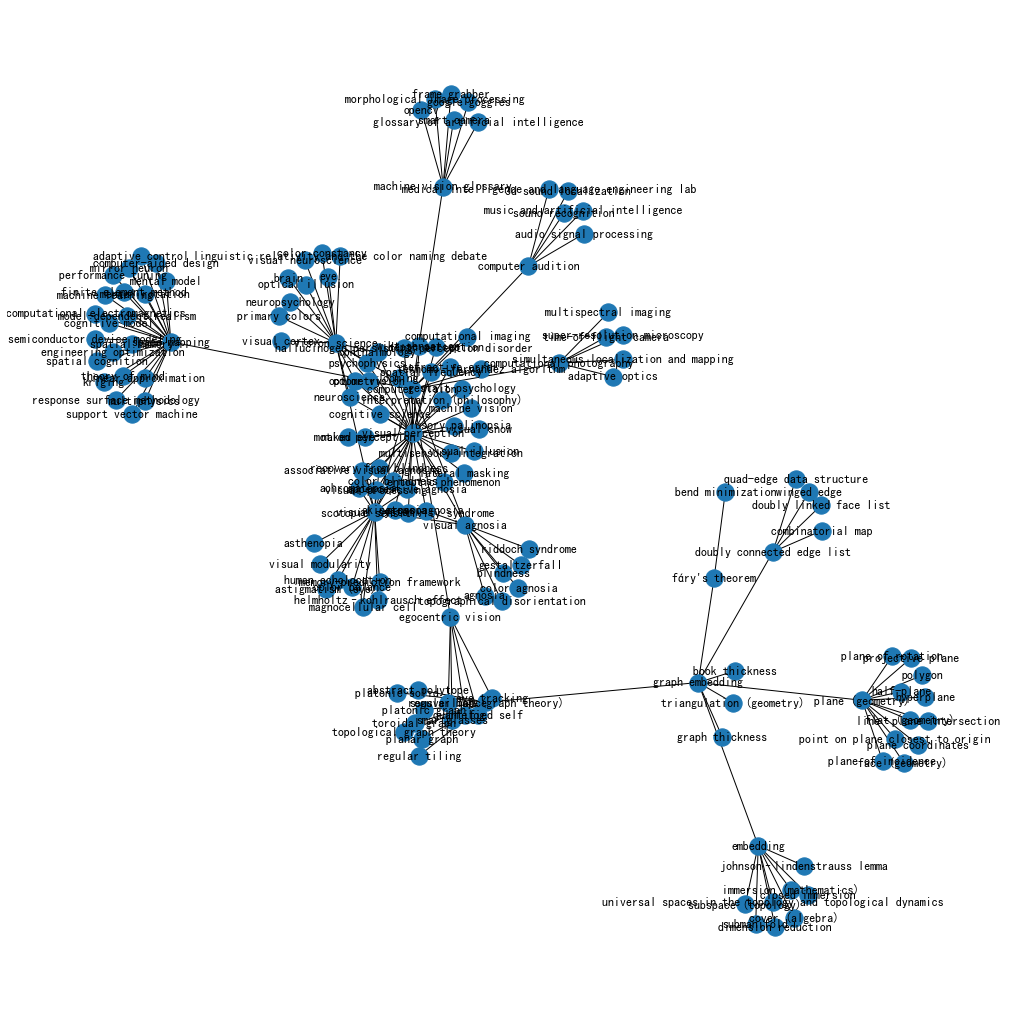

In [13]:
##无向图可视化
plt.figure(figsize=(14,14))
nx.draw(non_graph,with_labels=True)
plt.show()

In [7]:
nodes = list(non_graph.nodes())
nodes

['graph embedding',
 'embedding',
 'book thickness',
 'graph thickness',
 'doubly connected edge list',
 'plane (geometry)',
 'regular map (graph theory)',
 "fáry's theorem",
 'triangulation (geometry)',
 'bend minimization',
 'topological graph theory',
 'abstract polytope',
 'planar graph',
 'toroidal graph',
 'regular tiling',
 'platonic solid',
 'platonic graph',
 'face (geometry)',
 'flat (geometry)',
 'half-plane',
 'hyperplane',
 'line–plane intersection',
 'plane coordinates',
 'plane of incidence',
 'plane of rotation',
 'point on plane closest to origin',
 'polygon',
 'projective plane',
 'quad-edge data structure',
 'doubly linked face list',
 'winged edge',
 'combinatorial map',
 'closed immersion',
 'cover (algebra)',
 'dimension reduction',
 'immersion (mathematics)',
 'johnson–lindenstrauss lemma',
 'submanifold',
 'subspace (topology)',
 'universal spaces in the topology and topological dynamics',
 'computer vision',
 'computational imaging',
 'computational photography

Deepwalk随机游走词嵌入

In [121]:
def randomwalk(node,length):
    random_walk = [node]
    for i in range(length - 1):
        temp = list(non_graph.neighbors(node))  #获取结点的所有邻接点
        temp = list(set(temp) - set(random_walk))  #剔除结点自身
        if len(temp) == 0:
            break
        random_node = random.choice(temp)
        # print(random_node)
        random_walk.append(random_node)
        node = random_node
    return random_walk


In [122]:
ans = randomwalk('graph embedding',3)

In [117]:
random_walks = []
num = 10
walk_length = 5
for n in tqdm(nodes):
    for i in range(num):
        random_walks.append(randomwalk(n,walk_length))
print(len(random_walks))
print(random_walks[1])

 42%|████▏     | 63/149 [00:00<00:00, 544.39it/s]

graph thickness
over
book thickness
over
embedding
universal spaces in the topology and topological dynamics
over
book thickness
over
fáry's theorem
bend minimization
over
doubly connected edge list
winged edge
over
doubly connected edge list
combinatorial map
over
fáry's theorem
bend minimization
over
plane (geometry)
projective plane
over
embedding
immersion (mathematics)
over
dimension reduction
over
subspace (topology)
over
subspace (topology)
over
subspace (topology)
over
immersion (mathematics)
over
immersion (mathematics)
over
dimension reduction
over
universal spaces in the topology and topological dynamics
over
dimension reduction
over
subspace (topology)
over
graph embedding
triangulation (geometry)
over
graph embedding
plane (geometry)
projective plane
over
graph embedding
graph thickness
over
graph embedding
doubly connected edge list
quad-edge data structure
over
graph embedding
regular map (graph theory)
platonic graph
over
graph embedding
doubly connected edge list
winge

100%|██████████| 149/149 [00:00<00:00, 504.74it/s]


linguistic relativity and the color naming debate
visual perception
visual illusion
over
visual perception
optometry
vision science
psychophysics
visual perception
visual illusion
over
visual perception
color vision
vision science
ophthalmology
visual perception
associative visual agnosia
visual system
achromatopsia
visual perception
akinetopsia
visual system
apperceptive agnosia
visual perception
achromatopsia
visual system
visual agnosia
visual perception
illusory palinopsia
over
visual perception
entoptic phenomenon
over
visual perception
achromatopsia
visual system
visual processing
visual perception
spatial frequency
over
visual perception
visual snow
over
visual perception
refractive error
over
visual perception
refractive error
over
visual perception
lateral masking
over
visual perception
naked eye
over
visual perception
visual processing
visual system
astigmatism (eye)
visual perception
scotopic sensitivity syndrome
visual system
color blindness
visual perception
associative v

In [126]:
from gensim.models import Word2Vec

In [127]:
model = Word2Vec(vector_size=128,

                 window=4,
                 sg=1,
                 hs=0,
                 negative=10,
                 alpha=0.1,
                 seed=14,)

In [128]:
model.build_vocab(random_walks,progress_per=2)

In [137]:
model.train(random_walks,total_examples=model.corpus_count,epochs=500,report_delay=1)

(1307631, 2595000)

In [141]:
model.wv.similar_by_word('graph embedding')

[('hyperplane', 0.5373209714889526),
 ('doubly connected edge list', 0.5370212197303772),
 ('triangulation (geometry)', 0.5283004641532898),
 ('embedding', 0.5196956992149353),
 ('regular map (graph theory)', 0.5139936208724976),
 ('dimension reduction', 0.5005509257316589),
 ('plane (geometry)', 0.5004667639732361),
 ("fáry's theorem", 0.4895654320716858),
 ('graph thickness', 0.47360655665397644),
 ('bend minimization', 0.4673328101634979)]